# Adaptive Linear Neuron

- This tutorial introduces one of the single-layer neural networks called an adaptive linear neuron or 'ADALINE'. You can think of 'ADALINE' as an improved version of perceptron algorithm.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### ADALINE

In [2]:
class AdalineGD(object):
    def __init__(self, lr=0.01, epochs=50, random_state=1):
        # parameters:
        # lr: float; learning rate
        # epochs: int; number of iterations
        # random_state: int; random generator seed
        
        # self.w_: 1-d array; learned weights
        # self.cost_: list; sum-squared errors of loss function accumulated from each epoch
        
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
        
    def fit(self, X, y):
        # parameters:
        # X: {array-like}, shape = [n_samples, n_features]; training data
        # y: array-like, shape = [n_samples]; target (label) data
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for _ in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.lr * X.T.dot(errors)
            self.w_[0] += self.lr * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        # linear activation function (identity function)
        return X 
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) # using unit step function

### Load iris flowers dataset

In [3]:
df = pd.read_csv('./Iris.csv', header=None, encoding='utf-8', index_col=0)[1:]
df.head()

,1,2,3,4,5
0,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# get Iris-setosa and Iris-versicolor data (50 values each)
y = df.iloc[0:100, 4].to_numpy()
y = np.where(y == 'Iris-setosa', -1, 1)

# get 'sepal length' and 'petal length' features
X = df.iloc[0:100, [0, 2]].to_numpy(dtype='float32')

### Sum-squared error vs. epochs

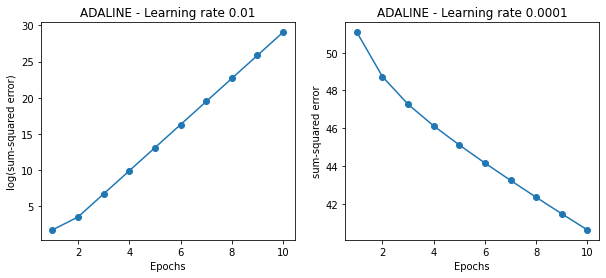

In [5]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
ada1 = AdalineGD(lr=0.01, epochs=10).fit(X, y)
plt.plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(sum-squared error)')
plt.title('ADALINE - Learning rate 0.01')

plt.subplot(1, 2, 2)
ada2 = AdalineGD(lr=0.0001, epochs=10).fit(X, y)
plt.plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum-squared error')
plt.title('ADALINE - Learning rate 0.0001')
plt.show()

### Feature standardization

In [6]:
# standardize each feature's mean to 0 and feature's standard deviation to 1 (unit variance) 
# for j-th feature, x.standardized-j = (x.j - x.mean-j) / x.std-j

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

### Train an ADALINE algorithm

In [7]:
def display_decision_boundary(X, y, classifier, step=0.02):
    markers = ('o', 'x', 's', '^', 'v')
    colors = ['red', 'blue', 'green', 'yellow', 'gray']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # display a decision boundary
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    # cdts is a short-form of coordinates
    # np.meshgrid returns coordinate matrices from coordinate vectors
    x1_cdts, x2_cdts = np.meshgrid(np.arange(x1_min-1, x1_max+1, step), np.arange(x2_min-1, x2_max+1, step))
    Z = classifier.predict(np.array([x1_cdts.ravel(), x2_cdts.ravel()]).T) # transpose an array using .T
    Z = Z.reshape(x1_cdts.shape)
    plt.contourf(x1_cdts, x2_cdts, Z, alpha=0.3, cmap=cmap)
    plt.xlim(x1_cdts.min(), x1_cdts.max())
    plt.ylim(x2_cdts.min(), x2_cdts.max())

    labels = {-1:'setosa', 1:'versicolor'}
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1], # use of boolean masks
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=labels[cl],
        )

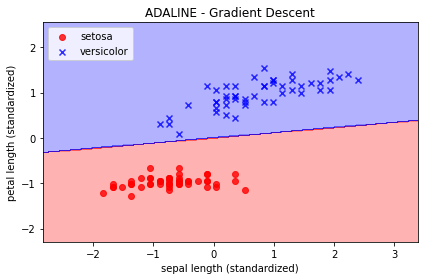

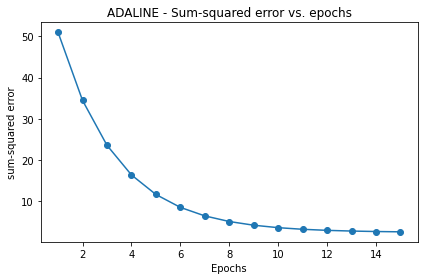

In [8]:
ada = AdalineGD(lr=0.01, epochs=15)
ada.fit(X_std, y)

# display a decision boundary
display_decision_boundary(X_std, y, classifier=ada)
plt.title('ADALINE - Gradient Descent')
plt.xlabel('sepal length (standardized)')
plt.ylabel('petal length (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.title('ADALINE - Sum-squared error vs. epochs')
plt.xlabel('Epochs')
plt.ylabel('sum-squared error')
plt.tight_layout()
plt.show()

### Further study: Stochastic gradient descent (SGD) and online learning

In [9]:
# Previous ADALINE was represented using gradient descent method (GD), so a little modification can alter it to SGD

class AdalineSGD(object):
        def __init__(self, lr=0.01, epochs=50, shuffle=True, random_state=1):
            # parameters:
            # lr: float; learning rate
            # epochs: int; number of iterations
            # shuffle: bool; shuffle training dataset when shuffle = True
            # random_state: int; random generator seed

            # self.w_: 1-d array; learned weights
            # self.cost_: list; sum-squared errors of loss function accumulated from each epoch

            self.lr = lr
            self.epochs = epochs
            self.shuffle = shuffle
            self.random_state = random_state
            self.w_initialized = False
        
        def fit(self, X, y):
            # parameters:
            # X: {array-like}, shape = [n_samples, n_features]; training data
            # y: array-like, shape = [n_samples]; target (label) data

            self._initialize_weights(X.shape[1])
            self.cost_ = []
            for _ in range(self.epochs):
                if self.shuffle:
                    X, y = self._shuffle(X, y)
                cost = []
                for xi, target in zip(X, y):
                    cost.append(self._update_weights(xi, target))
                avg_cost = sum(cost) / len(y)
                self.cost_.append(avg_cost)
            return self
        
        # this function is used during online learning because it does not re-initialize the weights (if previously initialized)
        def partial_fit(self, X, y):
            if not self.w_initialized:
                self._initialize_weights(X.shape[1])
            if y.ravel().shape[0] > 1:
                self._update_weights(xi, target)
            else:
                self._update_weights(X, y)
            return self
        
        def _shuffle(self, X, y):
            r = self.rgen.permutation(len(y))
            return X[r], y[r]
        
        def _initialize_weights(self, m):
            self.rgen = np.random.RandomState(self.random_state)
            self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
            self.w_initialized = True
        
        def _update_weights(self, xi, target):
            output = self.activation(self.net_input(xi))
            error = (target - output)
            self.w_[1:] += self.lr * xi.dot(error)
            self.w_[0] += self.lr * error
            cost = 0.5 * (error**2)
            return cost
            
        def net_input(self, X):
            return np.dot(X, self.w_[1:]) + self.w_[0]
        
        def activation(self, X):
            # linear activation function (identity function)
            return X
        
        def predict(self, X):
            return np.where(self.net_input(X) >= 0.0, 1, -1) # using unit step function

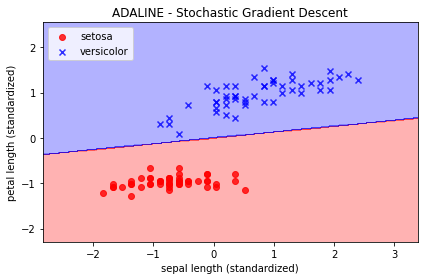

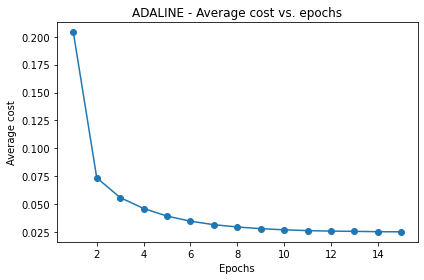

In [10]:
ada = AdalineSGD(lr=0.01, epochs=15)
ada.fit(X_std, y)

# display a decision boundary
display_decision_boundary(X_std, y, classifier=ada)
plt.title('ADALINE - Stochastic Gradient Descent')
plt.xlabel('sepal length (standardized)')
plt.ylabel('petal length (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.title('ADALINE - Average cost vs. epochs')
plt.xlabel('Epochs')
plt.ylabel('Average cost')
plt.tight_layout()
plt.show()